<a href="https://colab.research.google.com/github/R1N-NY44/AKA/blob/main/Flip_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Performa Pendekatan Rekursif vs Iteratif pada Horizontal Image Flipping

**Note: Teks yang udah ada gambarnya gausah diotak-atik lagi :D**


Contoh Gambar bisa ambil sini:
https://drive.google.com/drive/folders/1tpZc44HsvXNyKCNCGPozxHc_OXzmndF_?usp=sharing

## Objektif

1. Horizontal Image Flipping
2. Analisis runtime

## Akses Tensor RGB

 Tentang tensor image:
- tensor per channel tuh representasi dari intensitas cahaya si warna itu. Misal: Di tensor red ada nilai 0, brarti warna merah tuh gak muncul (gelap kalo di visualnya). Kalau nilai 255 berarti merahnya maksimal (terang kalo di visualnya)
- Interval nilainya tuh cuma 0-255

In [8]:
# Note: Ini juga gausah diotak-atik, terus pake library ini aja cukup lah ya. Goodluck ;D
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

In [9]:
def ambil_tensor(path_img):

  img = Image.open(path_img)
  width, height = img.size

  tensor = np.array(img)

  red = tensor[:,:,0]
  green = tensor[:,:,1]
  blue = tensor[:,:,2]

  return {
      "ukuran_img": (width, height),
      "tensor": tensor.shape,
      "red": red,
      "green": green,
      "blue": blue
  }

def tampilin_gambar(rgb_dict):
    red = rgb_dict["red"]
    green = rgb_dict["green"]
    blue = rgb_dict["blue"]

    rgb_img = np.stack((red, green, blue), axis=2)

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    axs[0].imshow(red, cmap="gray")
    axs[0].set_title("Channel merah")
    axs[0].axis("off")

    axs[1].imshow(green, cmap="gray")
    axs[1].set_title("Channel ijo")
    axs[1].axis("off")

    axs[2].imshow(blue, cmap="gray")
    axs[2].set_title("Channel biru")
    axs[2].axis("off")

    axs[3].imshow(rgb_img)
    axs[3].set_title("Gabungan RGB")
    axs[3].axis("off")

    plt.show()

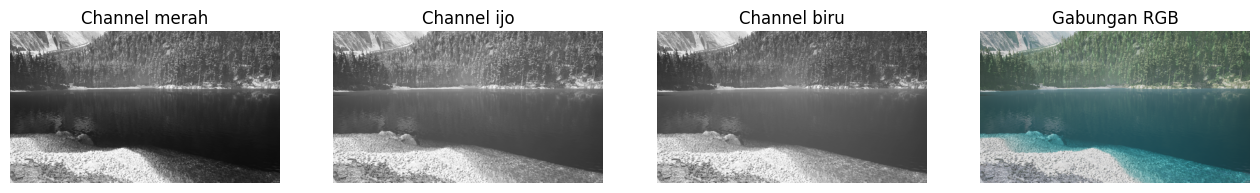

Ukuran Gambar:  (1920, 1080)
Ukuran Tensor:  (1080, 1920, 4)

 Tensor Red: 
 [[171 178 168 ...  64  65  52]
 [173 177 172 ...  64  63  54]
 [153 158 160 ...  62  59  54]
 ...
 [156 167 173 ...  51  56  55]
 [141 148 152 ...  46  47  43]
 [149 146 149 ...  40  40  41]]

 Tensor Green: 
 [[173 181 172 ...  80  78  66]
 [175 180 174 ...  78  76  67]
 [157 161 163 ...  77  72  68]
 ...
 [159 169 177 ... 111 116 113]
 [144 151 155 ... 109 110 104]
 [153 149 152 ...  99  98  99]]

 Tensor Blue: 
 [[174 181 173 ...  69  69  59]
 [175 181 175 ...  69  68  61]
 [159 162 163 ...  69  67  61]
 ...
 [168 177 184 ... 118 124 121]
 [153 162 165 ... 116 118 112]
 [162 159 161 ... 106 105 106]]


In [10]:
# Cara pake

naiad = ambil_tensor("content/Lushfoil Photography.png")
tampilin_gambar(naiad)
print("Ukuran Gambar: ", naiad["ukuran_img"])
print("Ukuran Tensor: ", naiad["tensor"])

print("\n Tensor Red: \n", naiad["red"])
print("\n Tensor Green: \n", naiad["green"])
print("\n Tensor Blue: \n", naiad["blue"])

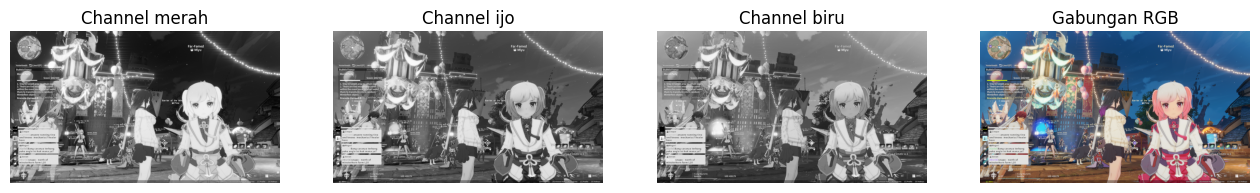

Ukuran Gambar:  (1920, 1080)
Ukuran Tensor:  (1080, 1920, 4)

 Tensor Red: 
 [[ 61  61  61 ...  58  58  60]
 [ 61  61  61 ...  58  58  59]
 [ 61  61  61 ...  58  58  58]
 ...
 [ 69  68  68 ...  61  62  62]
 [107 102 101 ...  63  64  64]
 [119 118 114 ...  65  66  67]]

 Tensor Green: 
 [[136 136 137 ... 129 129 130]
 [136 137 137 ... 129 129 129]
 [137 137 137 ... 129 129 129]
 ...
 [ 45  43  43 ...  39  39  39]
 [ 97  91  90 ...  39  40  40]
 [114 112 108 ...  41  41  41]]

 Tensor Blue: 
 [[182 182 182 ... 178 178 180]
 [182 183 183 ... 178 178 180]
 [182 183 183 ... 178 178 178]
 ...
 [ 32  30  30 ...  26  26  26]
 [ 90  82  81 ...  26  26  26]
 [106 104  99 ...  27  27  27]]


In [11]:
fgo = ambil_tensor("content/Blue Protocol_ Star Resonance 12_21_2025 6_24_00 PM.png")
tampilin_gambar(fgo)
print("Ukuran Gambar: ", fgo["ukuran_img"])
print("Ukuran Tensor: ", fgo["tensor"])

print("\n Tensor Red: \n", fgo["red"])
print("\n Tensor Green: \n", fgo["green"])
print("\n Tensor Blue: \n", fgo["blue"])

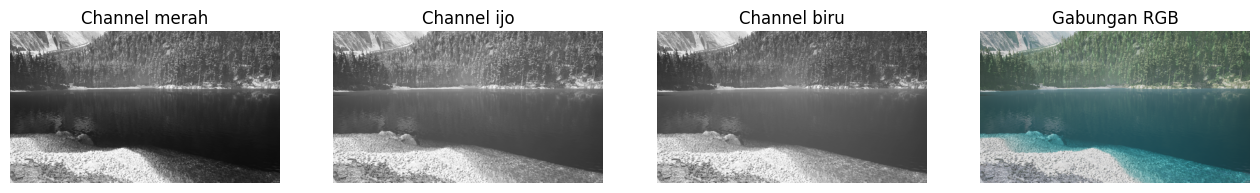

Ukuran Gambar:  (1920, 1080)
Ukuran Tensor:  (1080, 1920, 4)

 Tensor Red: 
 [[171 178 168 ...  64  65  52]
 [173 177 172 ...  64  63  54]
 [153 158 160 ...  62  59  54]
 ...
 [156 167 173 ...  51  56  55]
 [141 148 152 ...  46  47  43]
 [149 146 149 ...  40  40  41]]

 Tensor Green: 
 [[173 181 172 ...  80  78  66]
 [175 180 174 ...  78  76  67]
 [157 161 163 ...  77  72  68]
 ...
 [159 169 177 ... 111 116 113]
 [144 151 155 ... 109 110 104]
 [153 149 152 ...  99  98  99]]

 Tensor Blue: 
 [[174 181 173 ...  69  69  59]
 [175 181 175 ...  69  68  61]
 [159 162 163 ...  69  67  61]
 ...
 [168 177 184 ... 118 124 121]
 [153 162 165 ... 116 118 112]
 [162 159 161 ... 106 105 106]]


In [12]:
lunar = ambil_tensor("content/Lushfoil Photography.png")
tampilin_gambar(lunar)
print("Ukuran Gambar: ", lunar["ukuran_img"])
print("Ukuran Tensor: ", lunar["tensor"])

print("\n Tensor Red: \n", lunar["red"])
print("\n Tensor Green: \n", lunar["green"])
print("\n Tensor Blue: \n", lunar["blue"])

# Iteratif

Alur iteratifnya seperti ini:


1.   Akses tensornya
2.   Pisah per channel RGB
3.   Loop di tensor salah satu channel, swap elemen paling kiri sama paling kanan per baris sampai tengah
4.   Kalau udah 1 channel lanjut ke channel setelahnya (Kalau red udah brarti ke green dan seterusnya sampe udah flip tensor channel RGBnya)
5.   Kalau udah digabungin lagi

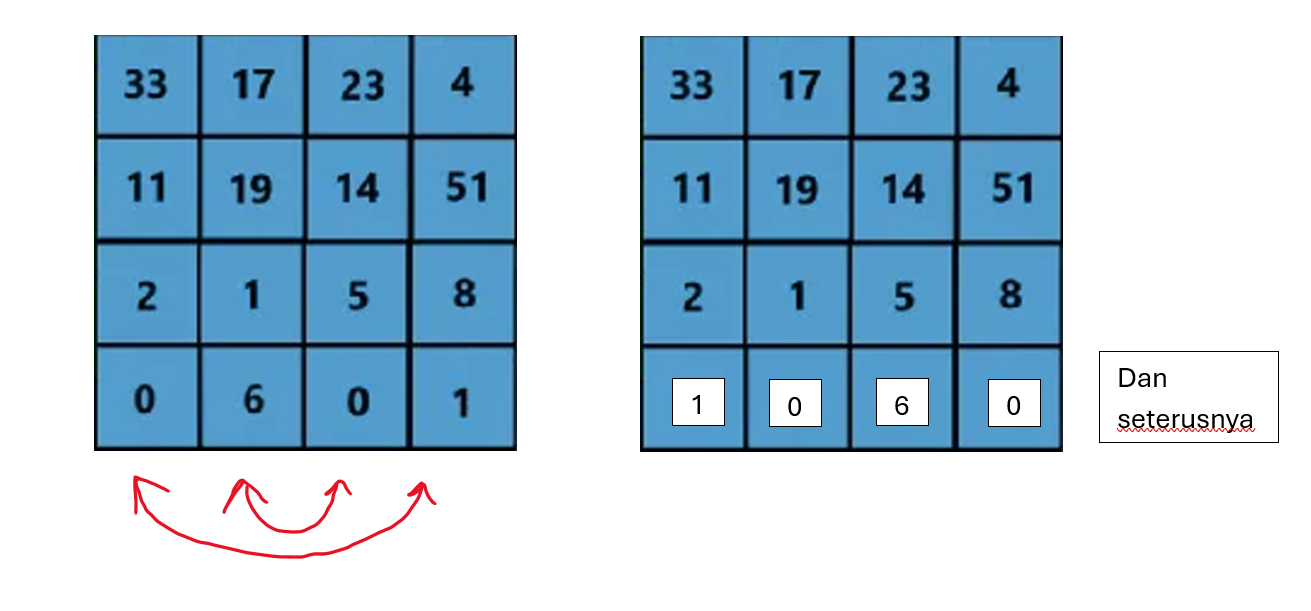

In [13]:
# Kode nya ditaruh disini
# Library udah ditaruh dibagian akses tensor

# Rekursif

1.   Akses tensornya
2.   Pisah per channel RGB
3.   Loop di tensor salah satu channel, swap elemen paling kiri sama paling kanan per baris sampai tengah
4.   Kalau udah 1 channel lanjut ke channel setelahnya (Kalau red udah brarti ke green dan seterusnya sampe udah flip tensor channel RGBnya)
5.   Kalau udah digabungin lagi

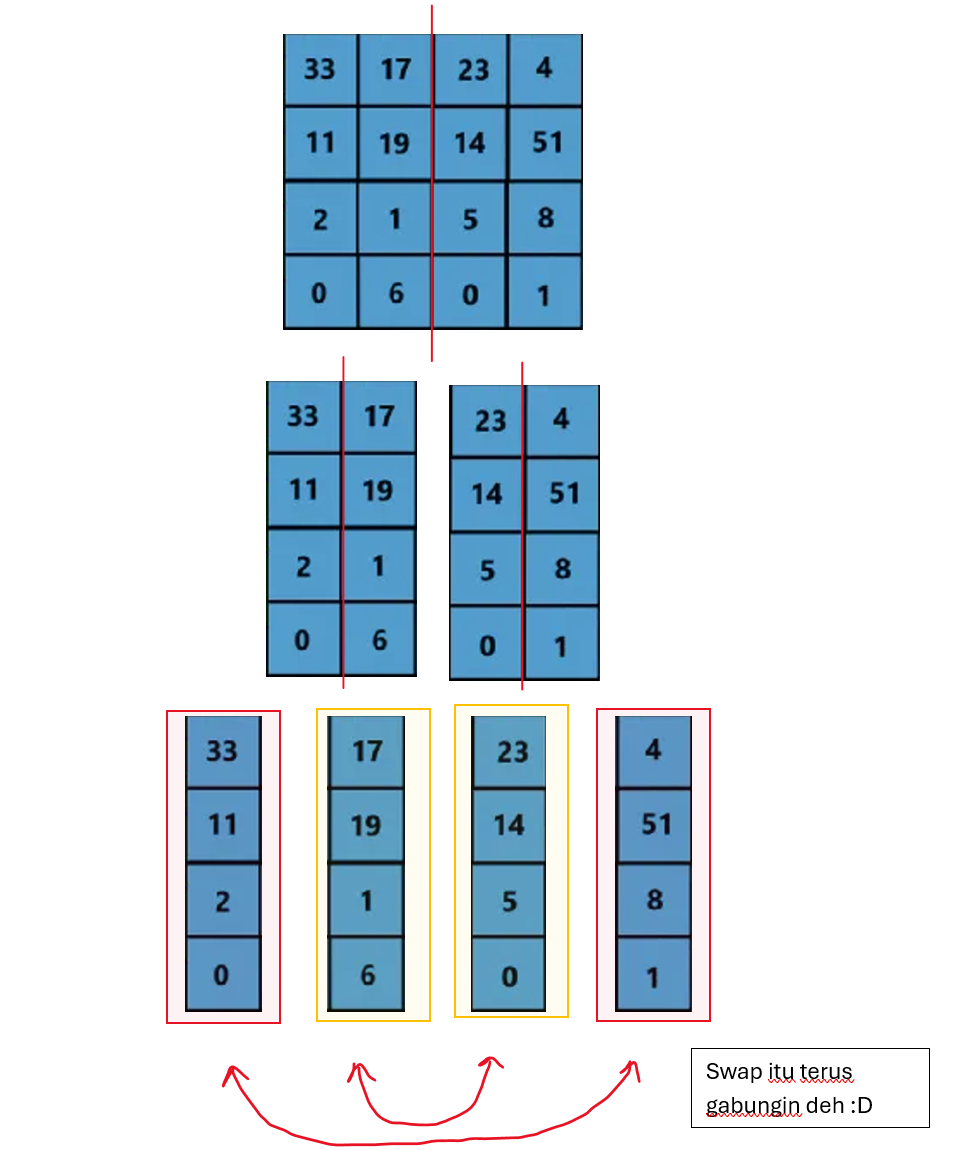


=== FOTO 1 ===
Runtime flip: 1.1495 detik


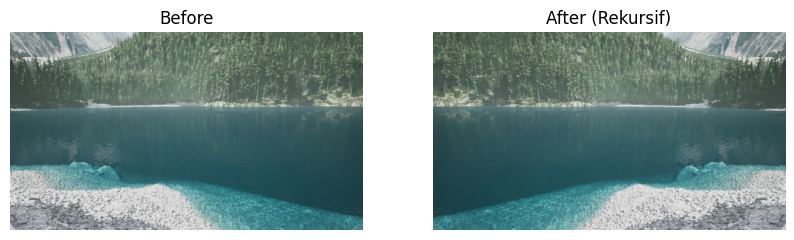


=== FOTO 2 ===
Runtime flip: 1.1221 detik


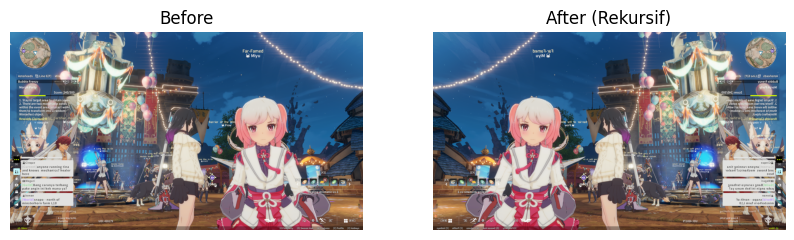


--- Ringkasan Runtime ---
Gambar 1: 1.1495 detik
Gambar 2: 1.1221 detik


In [26]:
# Kode nya ditaruh disini
# Library udah ditaruh dibagian akses tensor

paths = {
    "Foto 1": "content/Lushfoil Photography.png",
    "Foto 2": "content/Blue Protocol_ Star Resonance 12_21_2025 6_24_00 PM.png",
}

def swap_barisan_rekursif(baris, kiri, kanan):
    # Basis rekursi: jika pointer bertemu atau melewati tengah
    if kiri >= kanan:
        return

    # Tukar elemen kiri dan kanan
    baris[kiri], baris[kanan] = baris[kanan], baris[kiri]

    # Panggil rekursi ke dalam (menuju tengah)
    swap_barisan_rekursif(baris, kiri + 1, kanan - 1)

def flip_channel_rekursif(channel, index_baris=0):
    # Basis rekursi: semua baris sudah diproses
    if index_baris >= channel.shape[0]:
        return

    # Ambil satu baris
    baris = channel[index_baris]

    # Swap kiri-kanan pada baris tersebut
    swap_barisan_rekursif(baris, 0, len(baris) - 1)

    # Lanjut ke baris berikutnya
    flip_channel_rekursif(channel, index_baris + 1)
    
    
def flip_channel_rekursif(channel, index_baris=0):
    # Basis rekursi: semua baris sudah diproses
    if index_baris >= channel.shape[0]:
        return

    # Ambil satu baris
    baris = channel[index_baris]

    # Swap kiri-kanan pada baris tersebut
    swap_barisan_rekursif(baris, 0, len(baris) - 1)

    # Lanjut ke baris berikutnya
    flip_channel_rekursif(channel, index_baris + 1)
    
def flip_rgb_rekursif(rgb_dict, index_channel=0):
    channels = ["red", "green", "blue"]

    # Basis rekursi: semua channel selesai
    if index_channel >= len(channels):
        return

    # Ambil channel aktif
    nama_channel = channels[index_channel]
    channel = rgb_dict[nama_channel]

    # Flip channel
    flip_channel_rekursif(channel)

    # Lanjut ke channel selanjutnya
    flip_rgb_rekursif(rgb_dict, index_channel + 1)
    
    
def gabung_rgb(rgb_dict):
    return np.stack(
        (rgb_dict["red"], rgb_dict["green"], rgb_dict["blue"]),
        axis=2
    )


# ============================================================

def show_before_after(rgb, after_rgb):
    before_rgb = np.stack(
        (rgb["red"], rgb["green"], rgb["blue"]),
        axis=2
    )

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(before_rgb)
    plt.title("Before")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(after_rgb)
    plt.title("After (Rekursif)")
    plt.axis("off")

    plt.show()
    
# ============================================================

runtime_list = []

for label in paths:
    print(f"\n=== {label.upper()} ===")

    rgb = ambil_tensor(paths[label])

    # SIMPAN BEFORE
    rgb_before = {
        "red": rgb["red"].copy(),
        "green": rgb["green"].copy(),
        "blue": rgb["blue"].copy()
    }

    start = time.time()
    flip_rgb_rekursif(rgb)
    end = time.time()

    runtime = end - start
    runtime_list.append(runtime)

    print(f"Runtime flip: {runtime:.4f} detik")

    hasil_flip = gabung_rgb(rgb)

    show_before_after(rgb_before, hasil_flip)


print("\n--- Ringkasan Runtime ---")
for idx, t in enumerate(runtime_list):
    print(f"Gambar {idx+1}: {t:.4f} detik")


# ============================================================
# naiad = ambil_tensor("content/Lushfoil Photography.png")

# # Flip tensor RGB secara rekursif
# flip_rgb_rekursif(naiad)

# # Gabungin
# hasil_flip = gabung_rgb(naiad)

# # Hasil
# plt.imshow(hasil_flip)
# plt.axis("off")
# plt.title("Hasil Flip Horizontal Rekursif")
# plt.show()

